<a href="https://colab.research.google.com/github/ZaneBrain/portfolioprojects/blob/main/Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Exercise

This is an attempt to create a neural network that predicts the price of a diamond based on features such as carat, cut, color, clarity, depth, table, price, and individual length dimensions.

The data used in this exercise is available on Kaggle at the following link: [Diamond Prices](https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices) (License: CC-BY-NC-SA 4.0)

# Importing Common Data Analytics Libraries and Loading the Data

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Changing Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [51]:
df = pd.read_csv('gdrive/MyDrive/Sample_Datasets/Diamonds_Prices2022.csv')

# Data Exploration and Feature Engineering

In [52]:
print(df.columns) #Get all of the columns
print('\n')
print(len(df)) #Get the size of the data set
print('\n')
print(df.select_dtypes(['object']).columns) #Identify non-numeric columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


53943


Index(['cut', 'color', 'clarity'], dtype='object')


In [6]:
#Checking out the head of the data. The first column appears to be indexing values
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [62]:
#Removing the index column for latter exploration
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53943.0,26972.000000,15572.147122,1.0,13486.50,26972.00,40457.50,53943.00
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00
x,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
y,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
z,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80


In [9]:
#Finding the range of prices for diamonds
print(df['price'].max())
print(df['price'].min())

18823
326


In [10]:
#Checking for nulls in the data
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

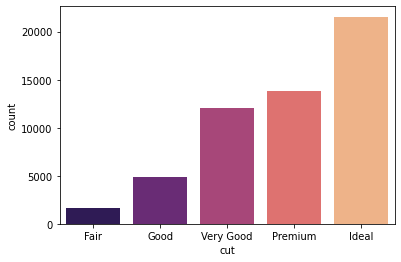

In [57]:
#Visualizing a count of diamonds by cut
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
sns.countplot(x='cut',data=df, palette='magma', order=cut_order)

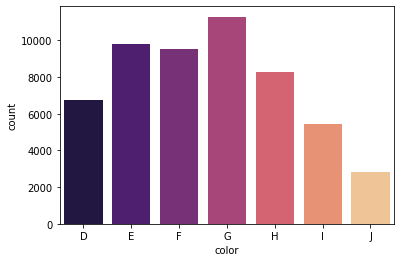

In [54]:
#Visualizing a count of diamonds by color
color_order = sorted(df['color'].unique())
sns.countplot(x='color',data=df,palette='magma', order = color_order)

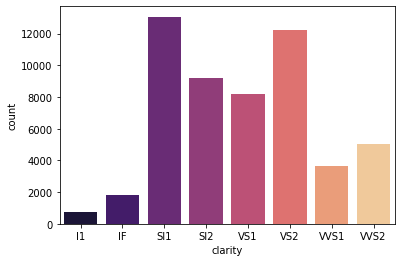

In [58]:
clarity_order = sorted(df['clarity'].unique())
sns.countplot(x='clarity',data=df,palette='magma', order=clarity_order)

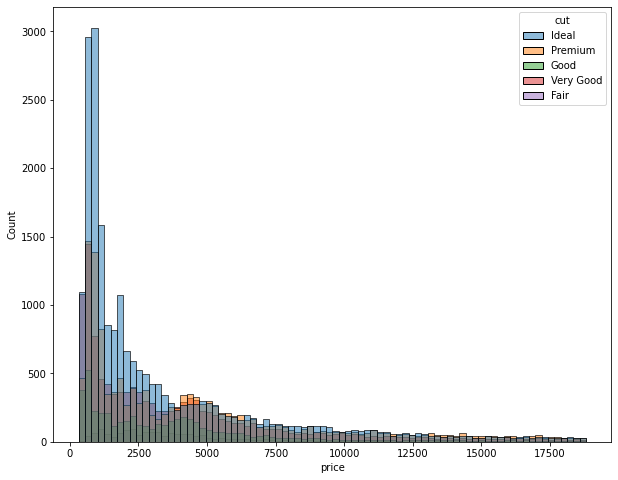

In [19]:
#Visualizing price frequency
plt.figure(figsize=(10,8))
sns.histplot(x='price', hue='cut',data=df)

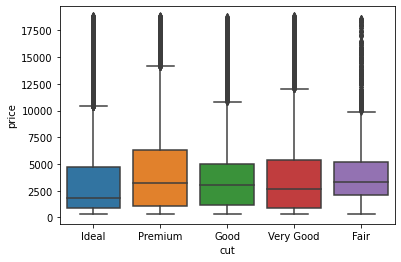

In [20]:
#Comparing price statistics by cut
sns.boxplot(x='cut', y='price', data=df)

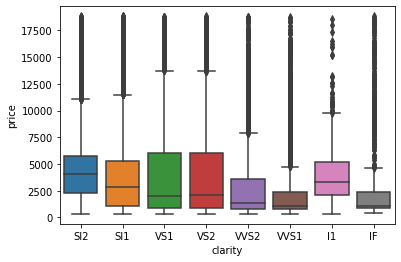

In [22]:
#Comparing price statistics by clarity
sns.boxplot(x='clarity', y='price', data=df)

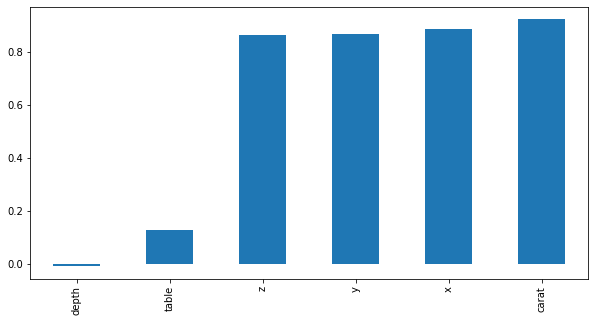

In [63]:
#Plotting correlation to price by features
plt.figure(figsize=(10,5))
df.corr()['price'].sort_values().drop('price').plot(kind='bar')

In [24]:
#As seen earlier, there are three columns that list categories. For the model, they'll need to be converted to numeric values.
df.select_dtypes(['object']).columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [65]:
#Converting Categorial Data to Dummies
cut_dummies = pd.get_dummies(df['cut'],drop_first=True)
color_dummies = pd.get_dummies(df['color'],drop_first=True)
clarity_dummies = pd.get_dummies(df['clarity'],drop_first=True)


In [66]:
#Add Dummy Columns to Data frame
df = pd.concat([df, cut_dummies, color_dummies, clarity_dummies],axis=1)

In [67]:
#Verifying the new dataframe
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,0,1,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,0,1,0,0,1,0,0,0,0


In [8]:
#Drop Category Columns
df = df.drop(['clarity', 'cut', 'color'],axis=1)

In [29]:
df.columns

Index(['Unnamed: 0', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z',
       'Good', 'Ideal', 'Premium', 'Very Good', 'E', 'F', 'G', 'H', 'I', 'J',
       'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='object')

In [10]:
df.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


# Normalizing the Data

In [12]:
#Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

#Creating X and y variables for features and labels
X = df.drop('price',axis = 1).values
y = df['price'].values

In [13]:
#Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 101)

In [14]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating and Training the Model

In [16]:
#Imports from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode= 'min', patience = 20)

In [21]:
model = Sequential()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53943 non-null  float64
 1   depth      53943 non-null  float64
 2   table      53943 non-null  float64
 3   price      53943 non-null  int64  
 4   x          53943 non-null  float64
 5   y          53943 non-null  float64
 6   z          53943 non-null  float64
 7   Good       53943 non-null  uint8  
 8   Ideal      53943 non-null  uint8  
 9   Premium    53943 non-null  uint8  
 10  Very Good  53943 non-null  uint8  
 11  E          53943 non-null  uint8  
 12  F          53943 non-null  uint8  
 13  G          53943 non-null  uint8  
 14  H          53943 non-null  uint8  
 15  I          53943 non-null  uint8  
 16  J          53943 non-null  uint8  
 17  IF         53943 non-null  uint8  
 18  SI1        53943 non-null  uint8  
 19  SI2        53943 non-null  uint8  
 20  VS1   

In [22]:
model.add(Dense(23, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(23, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse') #Loss is mean squared error

In [23]:
#Fitting the model
model.fit(x=X_train, y=y_train, epochs = 500, validation_data =(X_test,y_test), batch_size=128, callbacks=[early_stop])

Epoch 1/500
338/338 [==============================] - 2s 4ms/step - loss: 23459216.0000 - val_loss: 13613487.0000
Epoch 2/500
338/338 [==============================] - 1s 3ms/step - loss: 14538486.0000 - val_loss: 8696695.0000
Epoch 3/500
338/338 [==============================] - 1s 3ms/step - loss: 8238400.0000 - val_loss: 2217208.0000
Epoch 4/500
338/338 [==============================] - 1s 3ms/step - loss: 5818482.5000 - val_loss: 1510248.6250
Epoch 5/500
338/338 [==============================] - 1s 3ms/step - loss: 5493190.5000 - val_loss: 1589871.7500
Epoch 6/500
338/338 [==============================] - 1s 3ms/step - loss: 5256809.5000 - val_loss: 1572802.6250
Epoch 7/500
338/338 [==============================] - 1s 3ms/step - loss: 4999414.5000 - val_loss: 1348485.3750
Epoch 8/500
338/338 [==============================] - 1s 3ms/step - loss: 4986272.0000 - val_loss: 1498871.6250
Epoch 9/500
338/338 [==============================] - 1s 3ms/step - loss: 4889397.0000 - val

# Model Performance Evaluation

In [24]:
losses = pd.DataFrame(model.history.history)

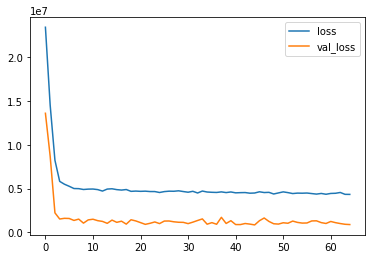

In [25]:
losses.plot() #Visualizing the model fitting

In [26]:
#Importing the metrics and making predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
predictions = model.predict(X_test)

338/338 [==============================] - 1s 2ms/step


In [34]:
#Outputing the results
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,predictions))) #Root Mean Squared Error
print('\n')
print('Mean Absolute Error:', mean_absolute_error(y_test,predictions)) #Mean Absolute Error
print('\n')
print('Explained Variance Score:', explained_variance_score(y_test,predictions)) #Explained Variance Score
print('\n')
print('Average Diamond Price:', df['price'].mean())

Root Mean Squared Error: 936.1082417140516


Mean Absolute Error: 575.8612347252011


Explained Variance Score: 0.9484853995994538


Average Diamond Price: 3932.734293606214


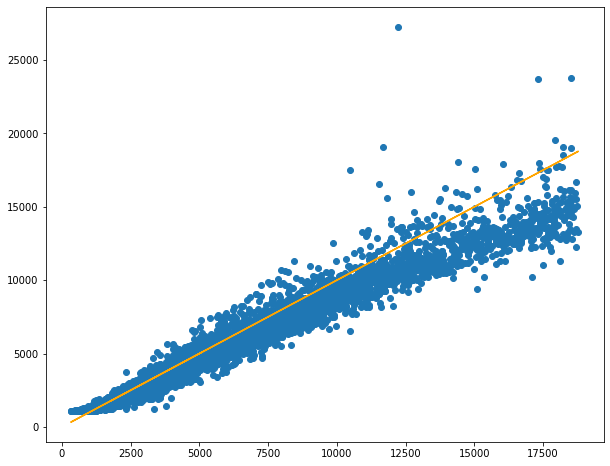

In [28]:
#Plotting the prediction results against the perfect prediction line
plt.figure(figsize=(10,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'orange')

In [43]:
#Selecting a Random Diamond from the Data Frame to Compare Against the Model
import random
random_ind = random.randint(0,len(df))


random_diamond = df.drop('price',axis=1).iloc[random_ind]

random_diamond = random_diamond.values.reshape(1,23)

random_diamond = scaler.transform(random_diamond)

In [44]:
#Predicting the Diamond's Price and Comparing to the True Price
print('Model predicted price:', *model.predict(random_diamond))
print('\n')
print('Actual price:', df.iloc[random_ind]['price'])

1/1 [==============================] - 0s 20ms/step
Model predicted price: [4477.944]


Actual price: 4327.0
